In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

In [481]:
df = pd.read_excel("datos_base.xlsx")

In [482]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca
0,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike
1,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike
2,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike
3,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike
4,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger


# Limpieza

In [483]:
print(df.isnull().sum())
print(f'\nDuplicados:{df.duplicated().sum()}')

Nombre Semana    0
Año              0
Semestre         0
Trimestre        0
Mes              0
Dia del Mes      0
Marca            0
Segmento         0
Mercado          0
Cantidad         0
Facturación      0
Precio           0
Sub Marca        0
dtype: int64

Duplicados:0


In [484]:
df.dtypes

Nombre Semana     object
Año                int64
Semestre          object
Trimestre         object
Mes               object
Dia del Mes       object
Marca             object
Segmento          object
Mercado           object
Cantidad           int64
Facturación      float64
Precio           float64
Sub Marca         object
dtype: object

### Conversion de columna a fecha

In [485]:
df['nombre_del_dia'] = df['Dia del Mes'].str.split(', ').str[0]
df['Dia del Mes'] = df['Dia del Mes'].str.split(', ').str[1]

In [486]:
# Cambio de columna 'Dia del mes' a formato fecha
month_mapping = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7,
                     'Agosto': 8, 'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}

df[['dia','mes','año']] =df['Dia del Mes'].str.split(' de ', expand = True)
df['mes'] = df['mes'].replace(month_mapping)
df['fecha'] = df['dia'].astype(str) + "/" + df['mes'].astype(str) + "/" + df['año'].astype(str)
df['fecha'] = pd.to_datetime(df['fecha'], format = '%d/%m/%Y')

### Distribuciones y outliers

In [487]:
def distr_values(variable, dataframe, titulo = ""):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    fig.suptitle(titulo, y = 1.05)

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = dataframe, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=dataframe, x = f"{variable}", ax = ax[1])

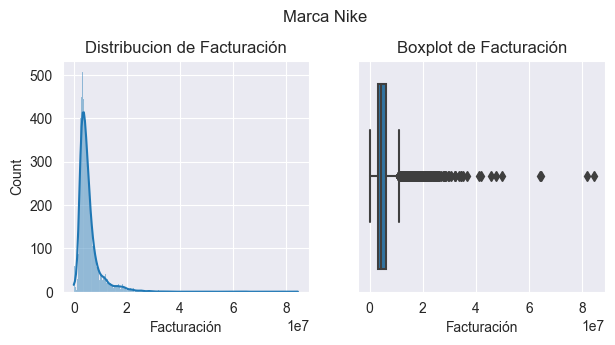

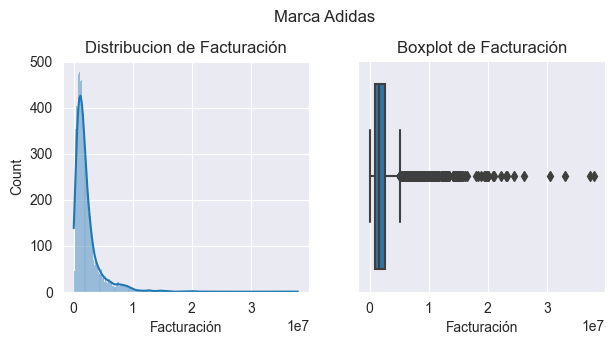

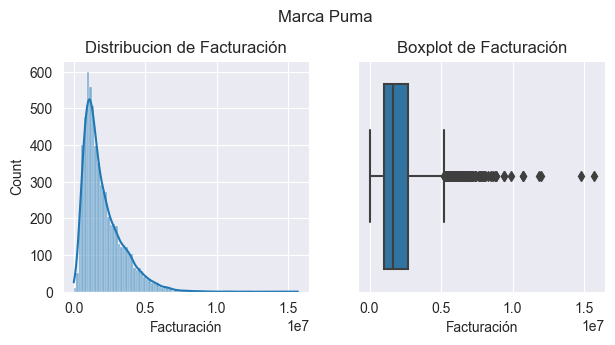

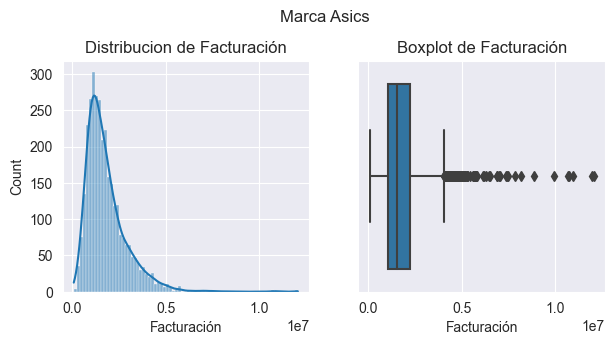

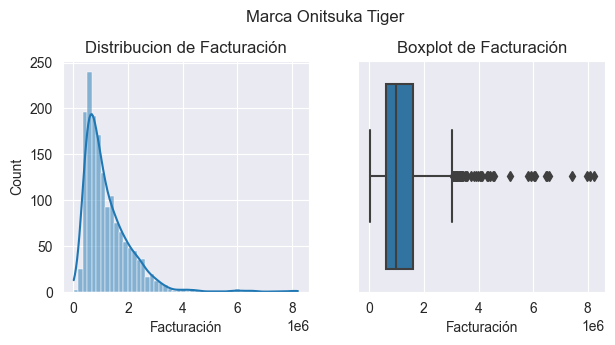

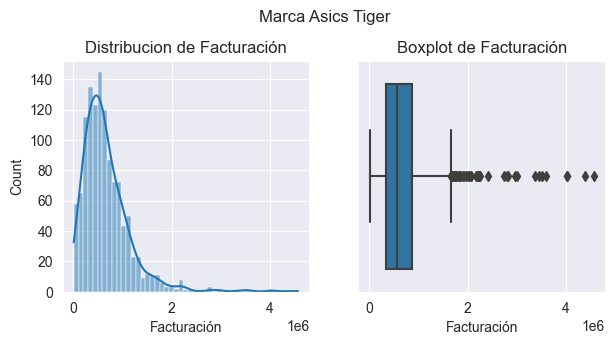

In [488]:
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Facturación',sub_df, titulo = f'Marca {marca}')

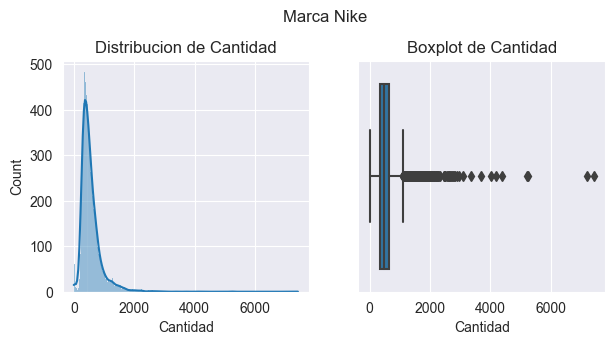

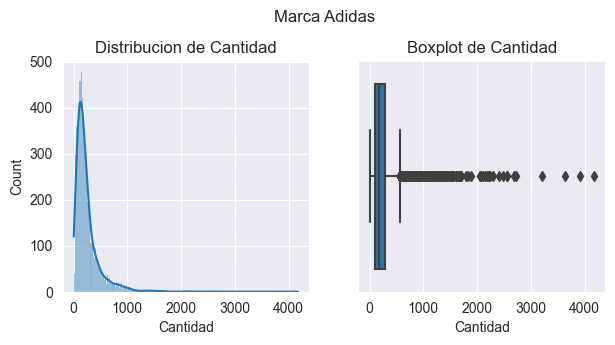

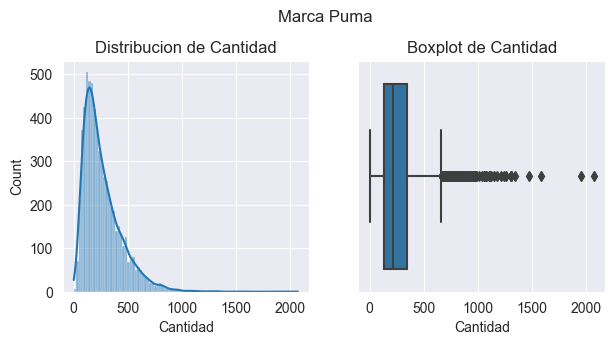

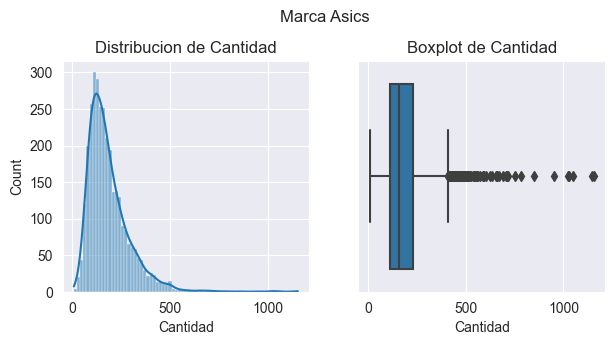

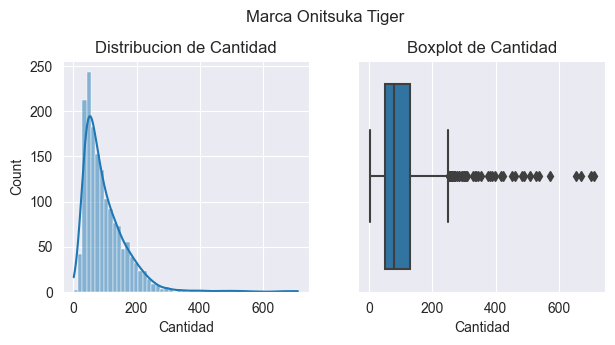

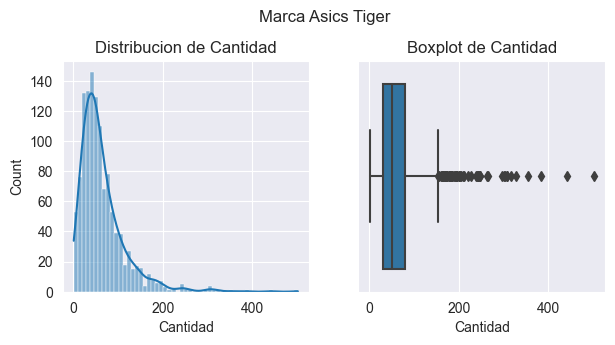

In [489]:
#Distribuciones de Cantidad
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Cantidad',sub_df, titulo = f'Marca {marca}')

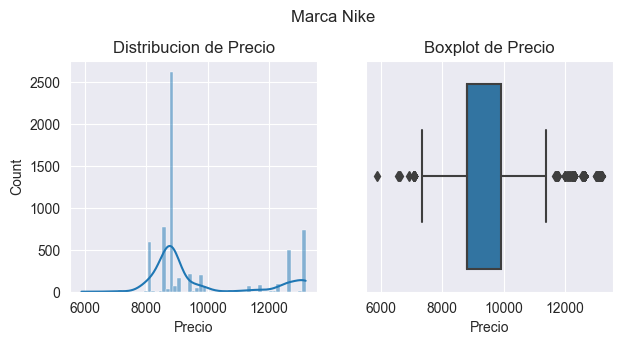

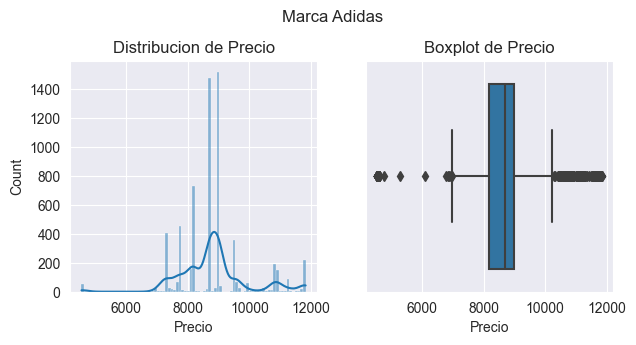

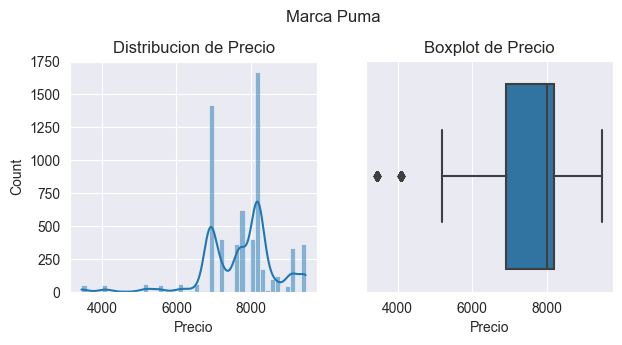

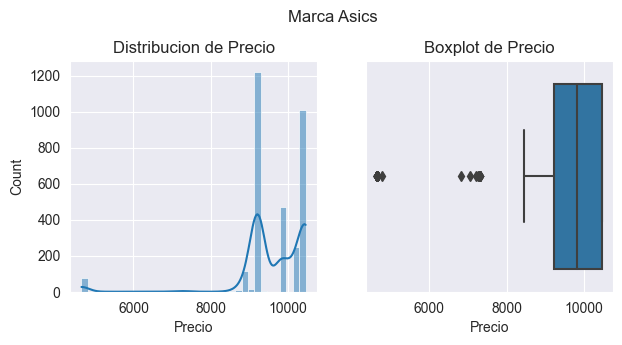

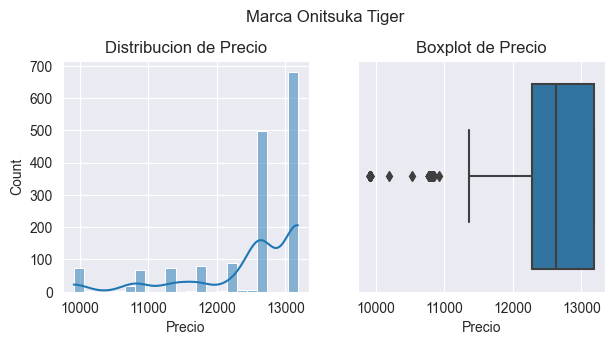

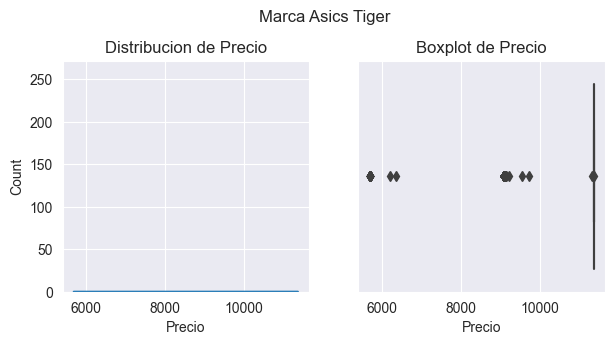

In [490]:
#Distribuciones de Precio
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Precio',sub_df, titulo = f'Marca {marca}')

# Analisis

In [491]:
df['semana_año'] = +df['Año'].astype(str) + "_"  +df['Nombre Semana'].str.split(" ").str[1]
df['semana_año'] = pd.to_datetime(df['semana_año'] + '_1', format='%Y_%W_%w').dt.strftime('%Y_%W')

In [492]:
color_fondo = '#001e64ff'

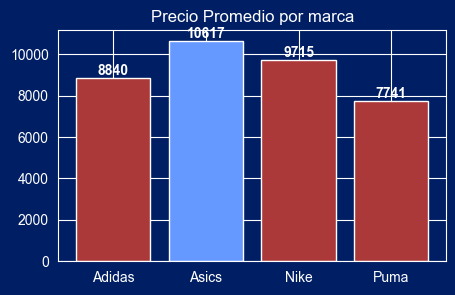

In [493]:
marca_precio_promedio = df.groupby(by = ['Marca']).agg({"Precio": "mean"})

plt.figure(figsize=(5, 3))

# Setting the background color of the entire figure
plt.gcf().set_facecolor(color_fondo)
plt.bar(marca_precio_promedio.index, marca_precio_promedio['Precio'], color = ['#ac3939','#6699ff' ,'#ac3939','#ac3939'])

ax = plt.gca()

# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor(color_fondo)

for i, value in enumerate(marca_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', color = 'white', weight = 'bold')

# Set text color for axes labels
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set text color for title
ax.title.set_color('white')

# Set text color for tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Precio Promedio por marca')
plt.savefig('imagenes/marcas_precios.jpg', format='jpg', dpi=300)
plt.show()

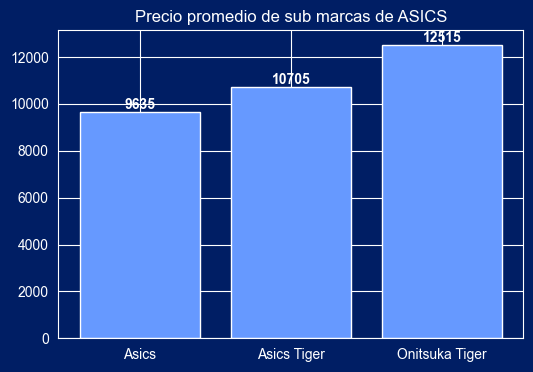

In [494]:
df_asics = df[df['Marca'] == 'Asics']
submarcas_precio_promedio = df_asics.groupby(by = 'Sub Marca').agg({'Precio':'mean'})

df_sub_asics = df[df['Sub Marca'] == 'Asics']
df_sub_asics.groupby(by = "Segmento").agg({'Precio':'mean'})

plt.figure(figsize=(6, 4))

plt.gcf().set_facecolor(color_fondo)
plt.bar(submarcas_precio_promedio.index, submarcas_precio_promedio['Precio'], color = '#6699ff')

ax = plt.gca()
ax.set_facecolor(color_fondo)

for i, value in enumerate(submarcas_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', color = 'white', weight = 'bold')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set text color for title
ax.title.set_color('white')

# Set text color for tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Precio promedio de sub marcas de ASICS')
plt.savefig('imagenes/submarcas_asics_precios.jpg', format='jpg', dpi=300)
plt.show()

In [495]:
df_test = df.pivot_table(index='fecha', columns=['Sub Marca', 'Segmento'], values = 'Precio')
df_test.tail(1)

Sub Marca        Adidas                                                 Asics  \
Segmento         Futbol  O. Deportes      Running        Social   O. Deportes   
fecha                                                                           
2022-03-14  8803.999797  8998.252137  8700.705908  11692.308128  10165.437287   

Sub Marca                  Asics Tiger         Nike                            \
Segmento         Running        Social       Futbol  O. Deportes      Running   
fecha                                                                           
2022-03-14  10382.547345  11363.912086  9644.637339  9477.056723  8876.884345   

Sub Marca               Onitsuka Tiger     Puma                            \
Segmento         Social         Social   Futbol  O. Deportes      Running   
fecha                                                                       
2022-03-14  13118.97535   13181.982353  7994.28  6509.951172  7727.042817   

Sub Marca                
Segmento         Social  
fecha                    
2022-03-14  7695.200678

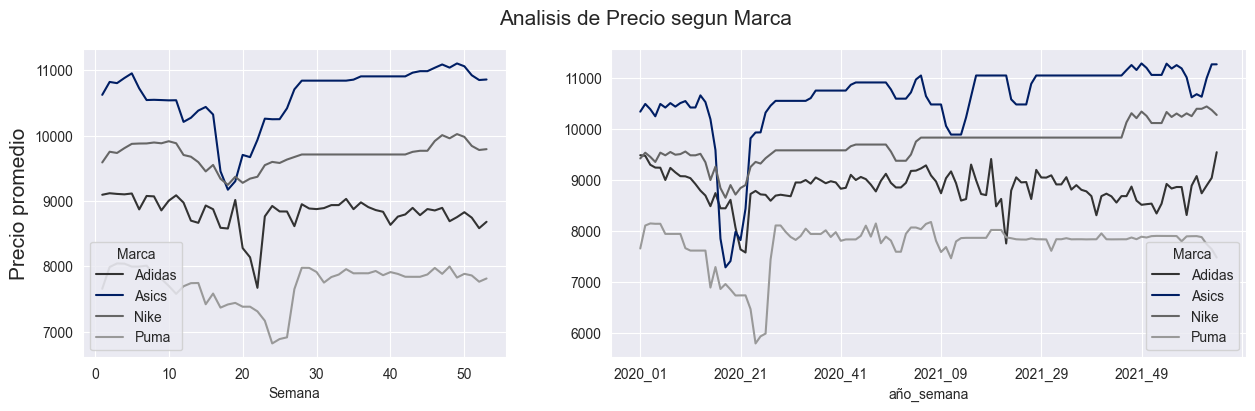

In [496]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

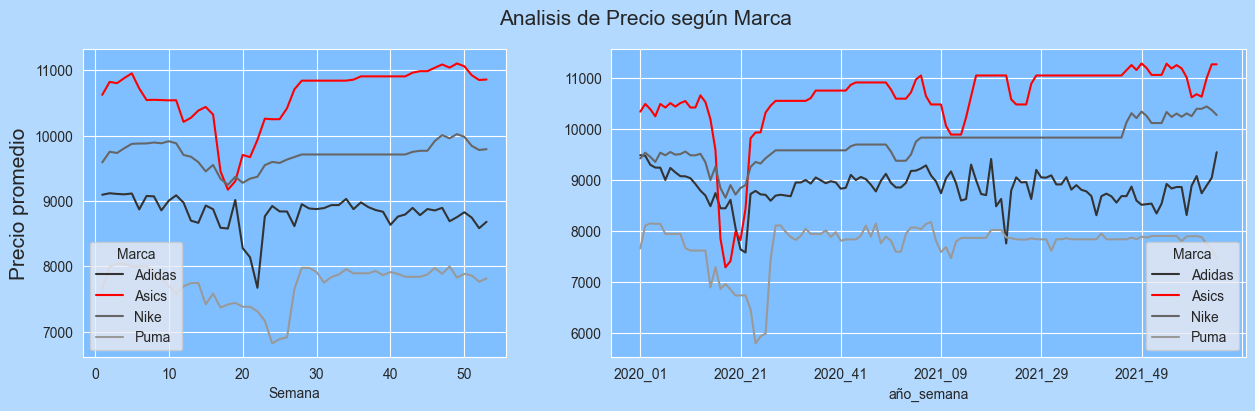

In [497]:
colors = ['#333333', 'red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

# Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

# Plot evolución
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

# Plot show
fig.suptitle(f'Analisis de {valores} según {analisis}', fontsize=15)
plt.savefig('imagenes/evolucion_precio.jpg',format = 'jpg', dpi = 300)
plt.show()

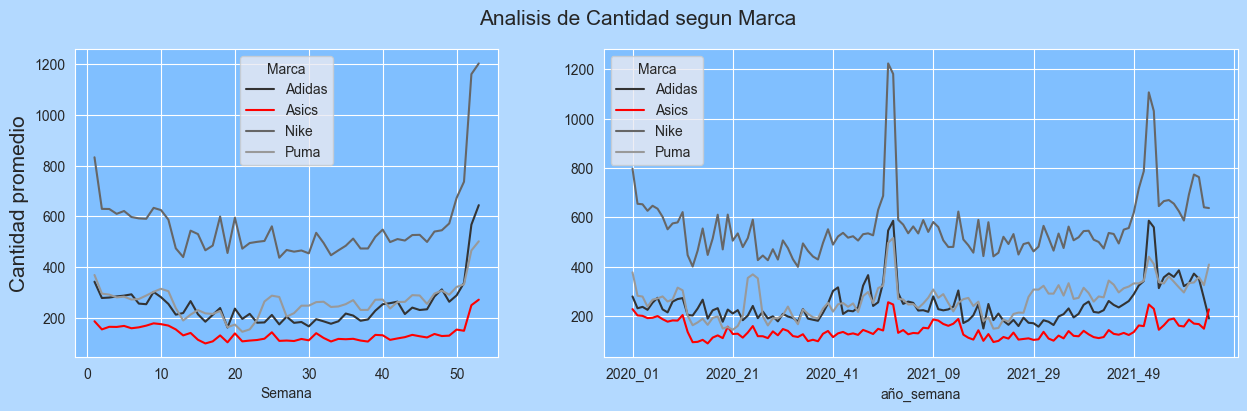

In [498]:
colors = ['#333333','red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Cantidad'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_cantidad = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_cantidad["Nombre Semana"] = pivot_cantidad["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_cantidad = pivot_cantidad.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_cantidad.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Cantidad promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_cantidad = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_cantidad.plot(color = colors, ax = axes[1], xlabel = "año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.savefig('imagenes/evolucion_cantidad.jpg',format = 'jpg', dpi = 300)
plt.show()

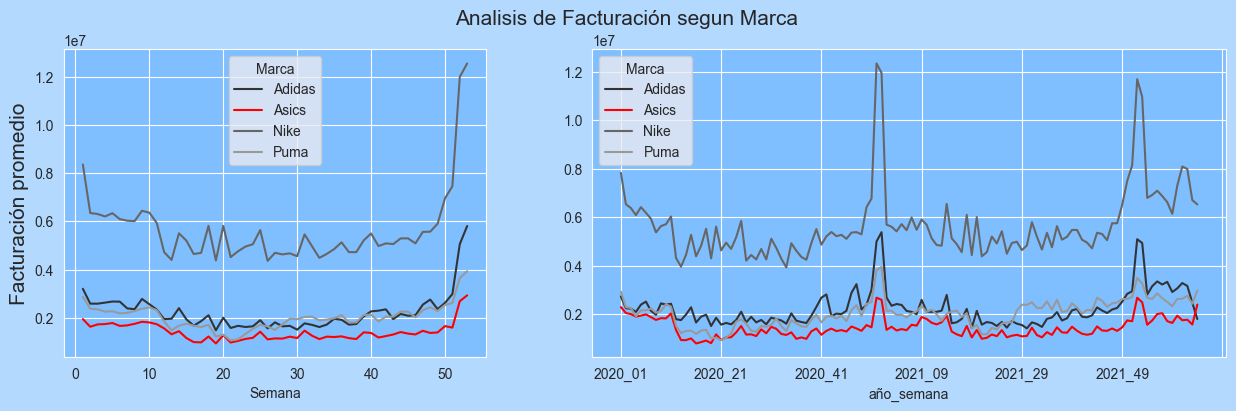

In [499]:
colors = ['#333333','red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_facturacion = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_facturacion["Nombre Semana"] = pivot_facturacion["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_facturacion = pivot_facturacion.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_facturacion.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Facturación promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_facturacion = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_facturacion.plot(color = colors, ax = axes[1], xlabel = "año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.savefig('imagenes/evolucion_facturacion.jpg',format = 'jpg', dpi = 300)
plt.show()

Exprimentan fuertes subas a fin de año, ASICS deberia hacer algo al respecto, parece ser la que menos crece.

In [500]:
df['numero_semana'] = df['Nombre Semana'].str.split().str[1]
pivot_fin_de_anio = df[(df['numero_semana'].astype(int) >= 48) | (df['numero_semana'].astype(int) <= 4)]
pivot_fin_de_anio = pivot_fin_de_anio.pivot_table(index = 'semana_año', columns = 'Marca', values = 'Cantidad', aggfunc= 'mean')
pivot_fin_de_anio

Marca,Adidas,Asics,Nike,Puma
semana_año,,,,
2020_01,278.593750,227.250000,796.687500,376.281250
2020_02,230.625000,201.714286,654.357143,281.446429
2020_03,236.357143,199.785714,652.339286,278.071429
2020_04,224.339286,190.666667,625.946429,236.785714
2020_48,365.017857,135.053571,534.446429,296.660714
2020_49,240.089286,126.250000,526.464286,251.178571
2020_50,254.821429,147.375000,629.464286,312.571429
2020_51,335.500000,140.553571,686.714286,322.428571
2020_52,545.958333,255.083333,1223.541667,496.375000


In [501]:
pivot_fin_de_anio_variacion = pivot_fin_de_anio.pct_change() * 100
pivot_fin_de_anio_variacion = pivot_fin_de_anio_variacion.fillna(0)
pivot_fin_de_anio_variacion

Marca,Adidas,Asics,Nike,Puma
semana_año,,,,
2020_01,0.000000,0.000000,0.000000,0.000000
2020_02,-17.218172,-11.236838,-17.865268,-25.203175
2020_03,2.485482,-0.956091,-0.308372,-1.199162
2020_04,-5.084618,-4.564414,-4.045879,-14.847162
2020_48,62.707952,-29.167707,-14.617864,25.286576
2020_49,-34.225331,-6.518577,-1.493535,-15.331367
2020_50,6.136110,16.732673,19.564480,24.441917
2020_51,31.660827,-4.628620,9.095035,3.153565
2020_52,62.729757,81.484775,78.173324,53.948826


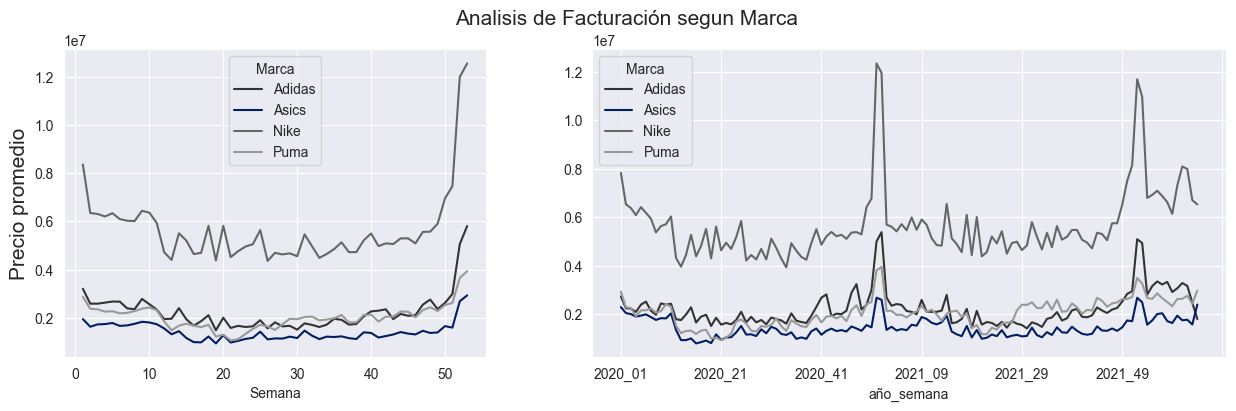

In [502]:
colors = ['#333333', '#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()

aplicaciones = ['Asics', '', '', 'Nike', '', '','Fitbit']

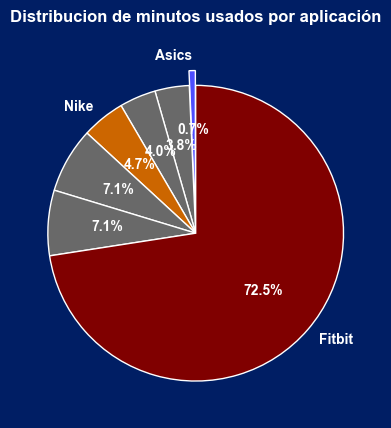

In [503]:
minutos_app = [0.69,3.76,3.99,4.74,7.16,7.16,72.68]
aplicaciones = ['Asics', '', '', 'Nike', '', '','Fitbit']

colores_pie = ['#4d4dff', '#696969', '#696969', '#cc6600', '#696969','#696969','#800000']

explode = (0.1, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots()

# Set the face color of the axes (background color)
ax.set_facecolor('blue')
fig.set_facecolor(color_fondo)

ax.pie(minutos_app, labels=aplicaciones, startangle=90, explode=explode, autopct='%1.1f%%', textprops={'color':'white','weight': 'bold'},colors=colores_pie,labeldistance=1.1)
ax.set_title('Distribucion de minutos usados por aplicación', weight = 'bold', color = 'white', y = 1.05)
plt.savefig('imagenes/distribucion_apps.jpg', format = 'jpg', dpi = 300)
plt.show()

In [504]:
def running_o_deportes(row):
    if (row['Segmento'] == 'Running') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_running'
    elif (row['Segmento'] == 'O. Deportes') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_deportes'
    else:
        return row['Sub Marca']

df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)

C:\Users\agusd\AppData\Local\Temp\ipykernel_11004\3971053450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)


In [505]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,nombre_del_dia,dia,mes,año,fecha,semana_año,numero_semana
0,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
1,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
2,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
3,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
4,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics,Sabado,26,2,2022,2022-02-26,2022_09,9
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9


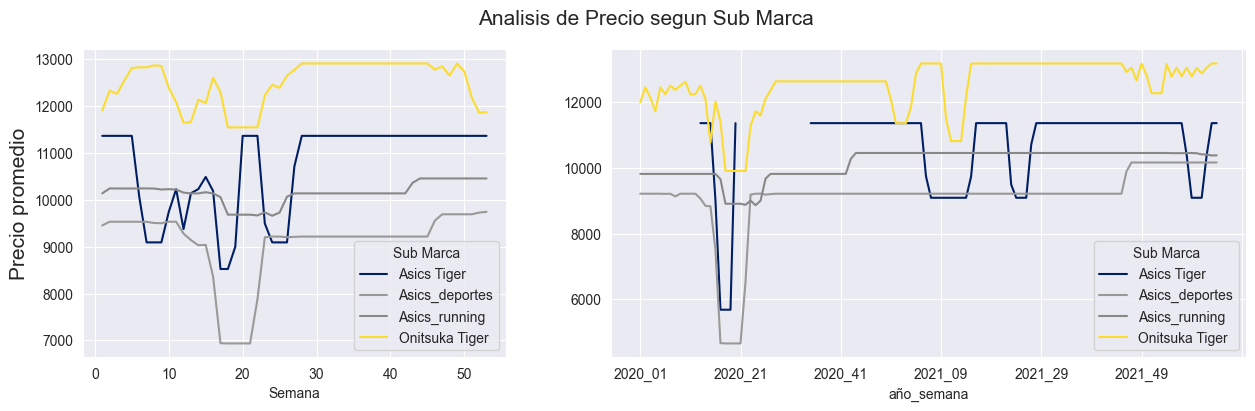

In [506]:
colors = ['#001e64', '#999999', '#888888', '#FBDC2F']

analisis = 'Sub Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df_asics.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()

In [507]:
df_asics = df[df["Marca"] == "Asics"]

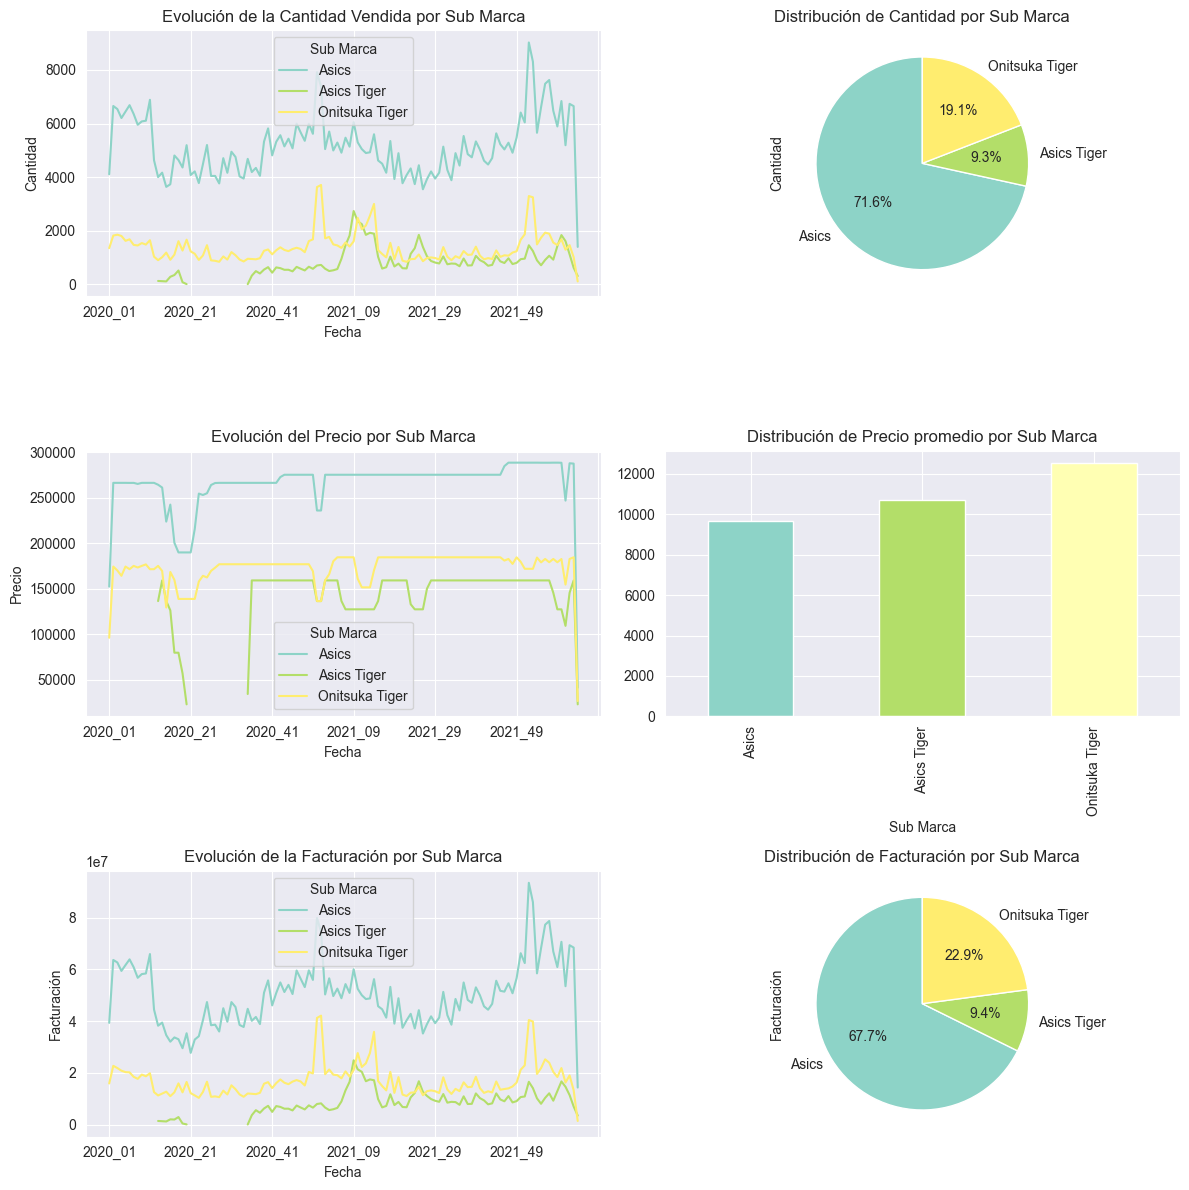

In [508]:
# Definir la categoría
categoria = "Sub Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

In [509]:
df_asics.groupby(['Sub Marca', 'Segmento']).agg(cantidad = ('Cantidad', 'sum'))

cantidad
Sub Marca      Segmento             
Asics          O. Deportes    246073
               Running        350632
Asics Tiger    Social          77911
Onitsuka Tiger Social         159305

Cuenta con tres submarcas: **Asics Onitsuka Tiger y Ascs Tiger**, siendo que la primera esta enfocada en deportes (running y otros deportes) y las dos últimas en lifestyle (social).

Asics es al sub marca que vende mayor cantidad (72%), siendo pro lo tanto la que más factura, habiendo generado el 68% de los ingresos del periodo). Sin embargo, Onitsuka Tiger es la de mayor precio promedio, siendo que la categoría social tiene productos de mayor precios


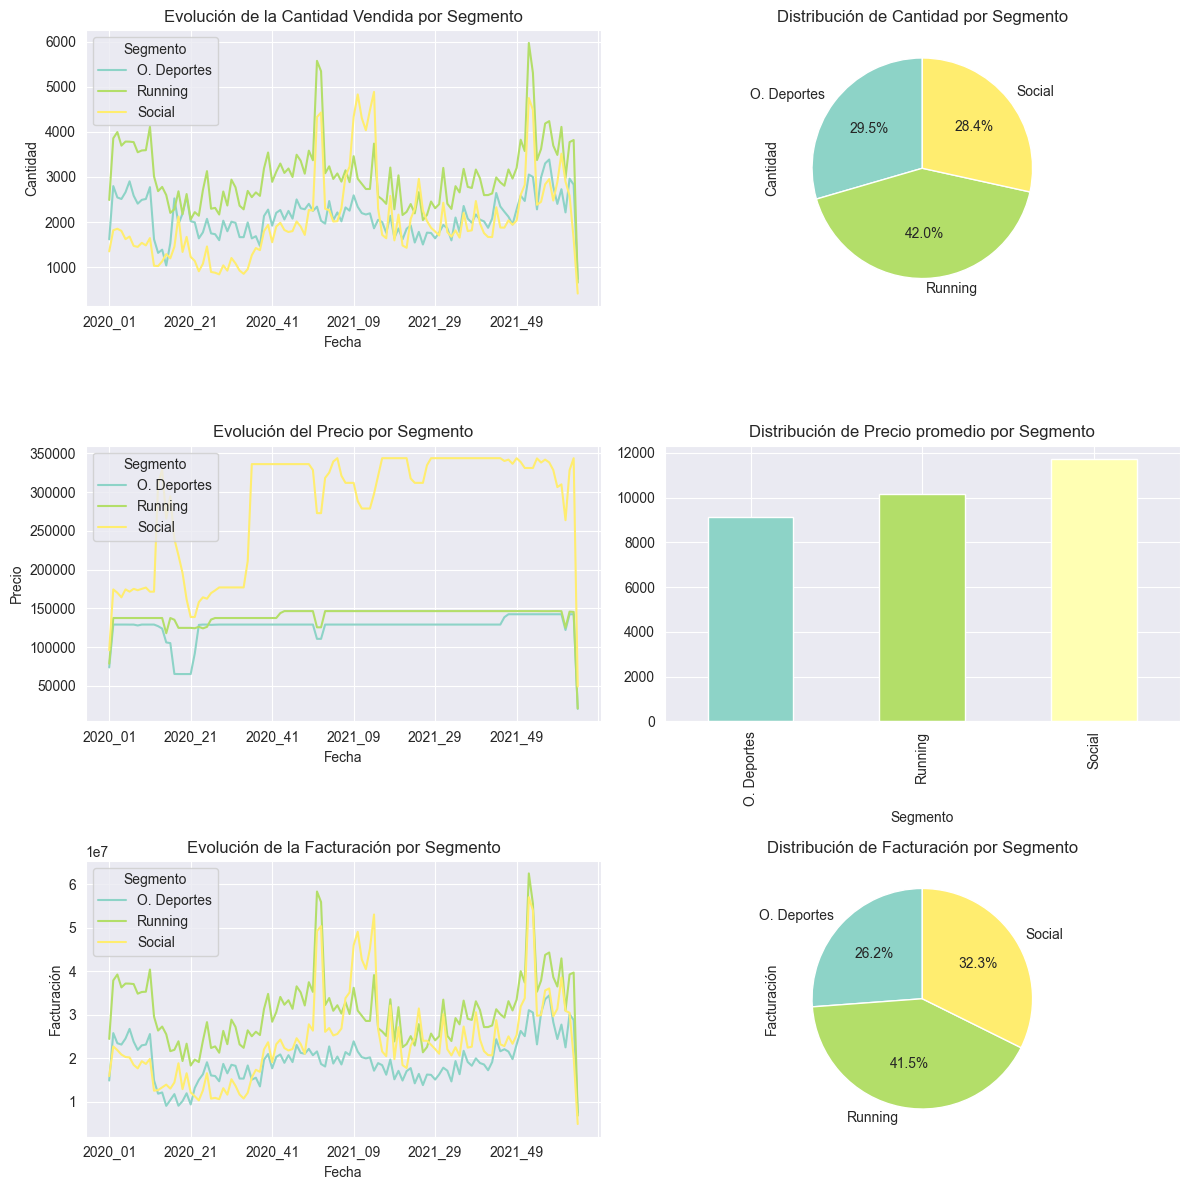

In [510]:
# Definir la categoría
categoria = "Segmento"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El segmento del cual más se venden es running, siendo social el de mayor cantidad vendida, mientras que social es le segmento de mayor precio promedio, llevando a que el segmento de mayor facturación sea running (41,5%), seguido por social (32,3%)

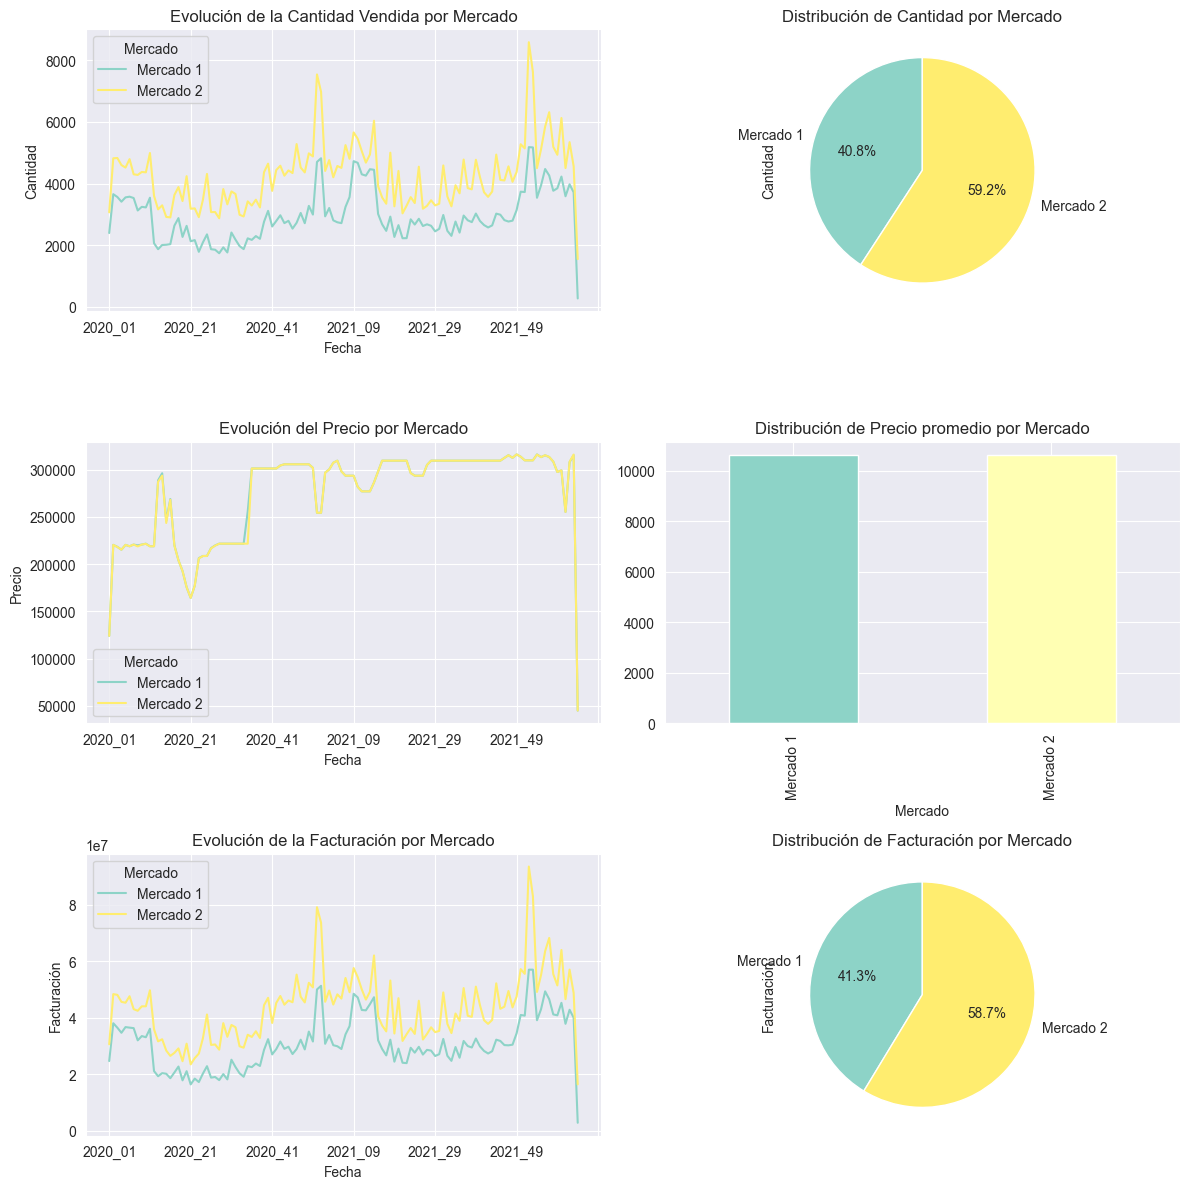

In [511]:
# Definir la categoría
categoria = "Mercado"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#FFFFB3', '#B3DE69', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

La distinción de mercado parecería no tener tanta relevancia, como vemos el precio es igual en ambos mercados (tiene sentido ya que es el mismo país), siendo que se vende mayor cantidad y se factura mas en el Mercado 2.

In [512]:
df_mercado_1 = df[df['Mercado'] == 'Mercado 1']

pivot_gral = df_mercado_1.pivot_table(index = 'fecha', columns= ['Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_gral.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_gral.columns = columnas_nuevas
#pivot_gral.drop(['Precio_Asics Tiger','Cantidad_Asics Tiger'], axis=1, inplace=True)
pivot_gral = pivot_gral.dropna()


In [513]:
pivot_gral

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,895.0,464.0,2722.0,1400.0,9484.859153,10556.280885,9585.250126,7522.408426
1,2020-01-03,990.0,495.0,2907.0,1522.0,9482.263111,10556.279428,9585.245314,7704.183396
2,2020-01-04,1454.0,704.0,4156.0,1924.0,9488.254334,10132.266903,9267.246823,7704.207640
3,2020-01-05,1588.0,728.0,4748.0,1908.0,9488.527654,10132.273843,9267.248807,7704.215840
4,2020-01-06,724.0,385.0,2332.0,1062.0,9489.759431,10132.272398,9267.242366,7704.172390
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,884.0,355.0,1950.0,1312.0,8685.613913,11247.871371,10480.859545,7593.342069
796,2022-03-11,1037.0,473.0,2263.0,1163.0,8674.801644,11244.397929,10232.915913,7577.963917
797,2022-03-12,1959.0,980.0,3320.0,1784.0,8674.622679,11271.594143,10241.143691,7607.641484
798,2022-03-13,1689.0,625.0,3479.0,1725.0,8674.454336,11257.964912,10232.596914,7535.626792


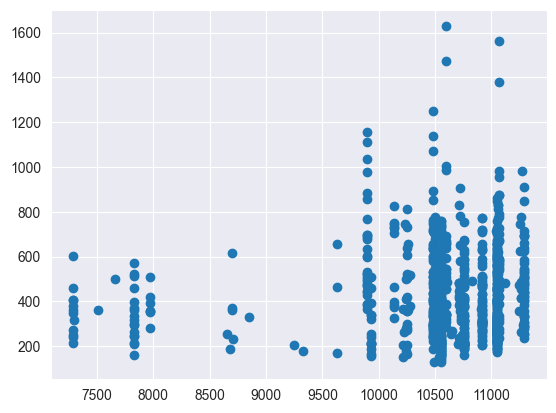

In [514]:
plt.scatter(pivot_gral['Precio_Asics'], pivot_gral['Cantidad_Asics'])

In [515]:
from scipy import stats
import numpy as np

def remove_outliers(df, columns_to_exclude=None, z_threshold=3):
    if columns_to_exclude is None:
        columns_to_exclude = []

    # Exclude specified columns from outlier detection
    numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(columns_to_exclude)

    # Calculate z-scores for numeric columns
    z_scores = stats.zscore(df[numeric_columns])

    # Identify rows where any numeric column's z-score exceeds the threshold
    outliers_mask = (abs(z_scores) < z_threshold).all(axis=1)

    # Return DataFrame without outliers
    return df[outliers_mask]

columns_to_exclude = ['fecha']

# Remove outliers from numeric columns while excluding the 'Date' column
pivot_gral = remove_outliers(pivot_gral, columns_to_exclude)

# Display the modified DataFrame
pivot_gral

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,895.0,464.0,2722.0,1400.0,9484.859153,10556.280885,9585.250126,7522.408426
1,2020-01-03,990.0,495.0,2907.0,1522.0,9482.263111,10556.279428,9585.245314,7704.183396
2,2020-01-04,1454.0,704.0,4156.0,1924.0,9488.254334,10132.266903,9267.246823,7704.207640
3,2020-01-05,1588.0,728.0,4748.0,1908.0,9488.527654,10132.273843,9267.248807,7704.215840
4,2020-01-06,724.0,385.0,2332.0,1062.0,9489.759431,10132.272398,9267.242366,7704.172390
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,884.0,355.0,1950.0,1312.0,8685.613913,11247.871371,10480.859545,7593.342069
796,2022-03-11,1037.0,473.0,2263.0,1163.0,8674.801644,11244.397929,10232.915913,7577.963917
797,2022-03-12,1959.0,980.0,3320.0,1784.0,8674.622679,11271.594143,10241.143691,7607.641484
798,2022-03-13,1689.0,625.0,3479.0,1725.0,8674.454336,11257.964912,10232.596914,7535.626792


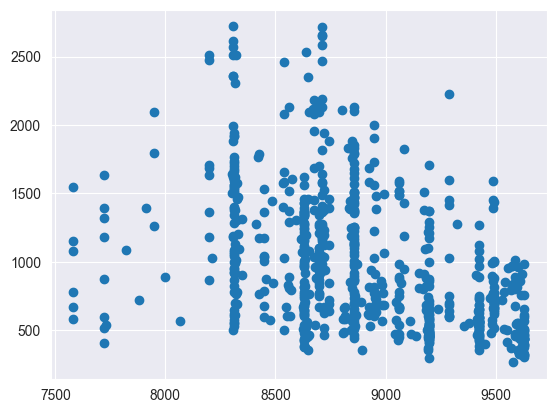

In [516]:
plt.scatter(pivot_gral['Precio_Adidas'], pivot_gral['Cantidad_Adidas'])

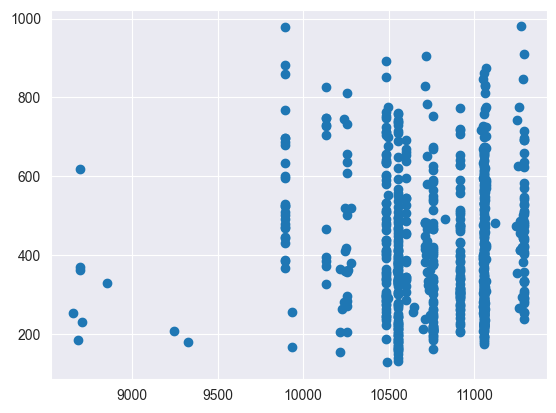

In [517]:
plt.scatter(pivot_gral['Precio_Asics'], pivot_gral['Cantidad_Asics'])

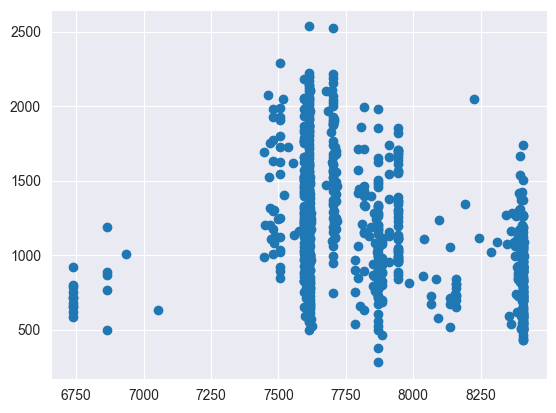

In [518]:
plt.scatter(pivot_gral['Precio_Puma'], pivot_gral['Cantidad_Puma'])

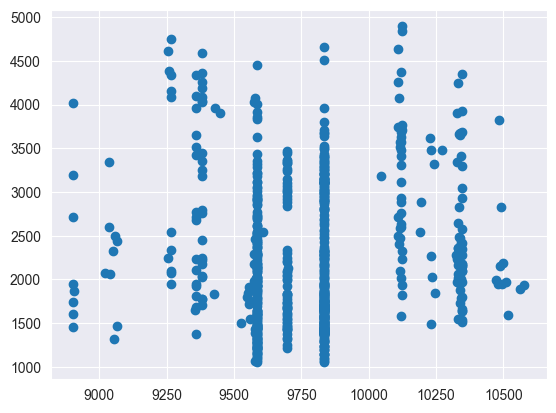

In [519]:
plt.scatter(pivot_gral['Precio_Nike'], pivot_gral['Cantidad_Nike'])

In [520]:
pivot_gral

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,895.0,464.0,2722.0,1400.0,9484.859153,10556.280885,9585.250126,7522.408426
1,2020-01-03,990.0,495.0,2907.0,1522.0,9482.263111,10556.279428,9585.245314,7704.183396
2,2020-01-04,1454.0,704.0,4156.0,1924.0,9488.254334,10132.266903,9267.246823,7704.207640
3,2020-01-05,1588.0,728.0,4748.0,1908.0,9488.527654,10132.273843,9267.248807,7704.215840
4,2020-01-06,724.0,385.0,2332.0,1062.0,9489.759431,10132.272398,9267.242366,7704.172390
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,884.0,355.0,1950.0,1312.0,8685.613913,11247.871371,10480.859545,7593.342069
796,2022-03-11,1037.0,473.0,2263.0,1163.0,8674.801644,11244.397929,10232.915913,7577.963917
797,2022-03-12,1959.0,980.0,3320.0,1784.0,8674.622679,11271.594143,10241.143691,7607.641484
798,2022-03-13,1689.0,625.0,3479.0,1725.0,8674.454336,11257.964912,10232.596914,7535.626792


In [521]:
X = pivot_gral[['Precio_Adidas','Precio_Asics', 'Precio_Nike', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_gral['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     35.82
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.72e-27
Time:                        00:09:38   Log-Likelihood:                -4651.6
No. Observations:                 718   AIC:                             9313.
Df Residuals:                     713   BIC:                             9336.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           465.7937    241.246      1.931

# Correlaciones a nivel marcas generales

En general la Marca Asics, ve mas afectada su

In [522]:
pivot_gral_semana = df_mercado_1.pivot_table(index = 'semana_año', columns= ['Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_gral_semana.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_gral_semana.columns = columnas_nuevas
#pivot_gral.drop(['Precio_Asics Tiger','Cantidad_Asics Tiger'], axis=1, inplace=True)
pivot_gral_semana = pivot_gral_semana.dropna()


In [523]:
pivot_gral_semana

,semana_año_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020_01,4927,2391,14533,6754,9485.976063,10344.275265,9426.247768,7658.753825
1,2020_02,7005,3653,20424,8942,9489.148438,10495.706236,9537.331926,8109.537903
2,2020_03,6839,3562,20285,8690,9305.516730,10395.856377,9453.997638,8143.863435
3,2020_04,6754,3409,18946,7504,9246.829448,10252.614765,9356.604151,8143.495949
4,2020_05,7712,3549,20065,8619,9245.593597,10495.708162,9539.882132,8143.878310
...,...,...,...,...,...,...,...,...,...
111,2022_08,9458,4225,17823,10139,9074.757911,10686.446978,10296.851038,7899.805799
112,2022_09,11091,3586,19238,10753,8729.896677,10635.964420,10343.376947,7873.835163
113,2022_10,10787,3973,18967,11141,8891.645534,10997.792350,10344.098620,7754.695572
114,2022_11,7821,3714,17183,10056,9038.391906,11259.961976,10323.634177,7757.382179


In [524]:
X = pivot_gral_semana[['Precio_Adidas','Precio_Asics', 'Precio_Nike', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_gral_semana['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     8.443
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.52e-06
Time:                        00:09:38   Log-Likelihood:                -928.03
No. Observations:                 116   AIC:                             1866.
Df Residuals:                     111   BIC:                             1880.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9559.6183   2860.213     -3.342

In [525]:
pivot_sub_segmento_semanal = df_mercado_1.pivot_table(index = 'semana_año', columns= ['Sub Marca','Segmento'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas_sub_seg = []
for i in pivot_sub_segmento_semanal.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1] + "_" + i[2])

pivot_sub_segmento_semanal.columns = columnas_nuevas_sub_seg

pivot_sub_segmento_semanal = pivot_sub_segmento_semanal.drop(['Precio_Asics Tiger_Social','Cantidad_Asics Tiger_Social'], axis=1)


In [526]:
X = pivot_sub_segmento_semanal[['Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running', 'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes',
       'Precio_Nike_Running', 'Precio_Nike_Social',
       'Precio_Onitsuka Tiger_Social', 'Precio_Puma_Futbol',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Running', 'Precio_Puma_Social']]

X = sm.add_constant(X)
y = pivot_sub_segmento_semanal['Cantidad_Asics_Running']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Cantidad_Asics_Running   R-squared:                       0.452
Model:                                OLS   Adj. R-squared:                  0.370
Method:                     Least Squares   F-statistic:                     5.497
Date:                    Tue, 21 Nov 2023   Prob (F-statistic):           5.55e-08
Time:                            00:09:38   Log-Likelihood:                -794.84
No. Observations:                     116   AIC:                             1622.
Df Residuals:                         100   BIC:                             1666.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [527]:
X = pivot_sub_segmento_semanal[['Precio_Adidas_Running',
       'Precio_Asics_Running', 'Precio_Nike_O. Deportes', 'Precio_Nike_Social',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Social']]

X = sm.add_constant(X)
y = pivot_sub_segmento_semanal['Cantidad_Asics_Running']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Cantidad_Asics_Running   R-squared:                       0.395
Model:                                OLS   Adj. R-squared:                  0.361
Method:                     Least Squares   F-statistic:                     11.85
Date:                    Tue, 21 Nov 2023   Prob (F-statistic):           3.38e-10
Time:                            00:09:38   Log-Likelihood:                -800.60
No. Observations:                     116   AIC:                             1615.
Df Residuals:                         109   BIC:                             1634.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

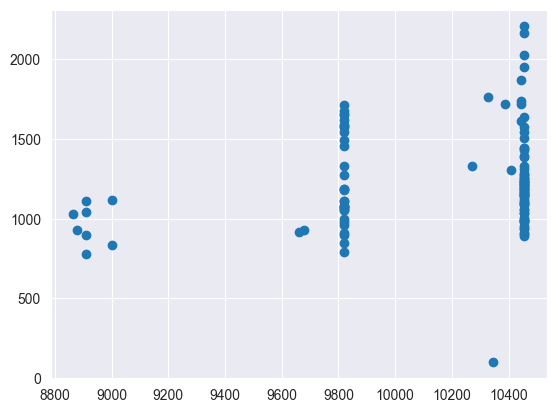

In [528]:
plt.scatter(pivot_sub_segmento_semanal['Precio_Asics_Running'], pivot_sub_segmento_semanal['Cantidad_Asics_Running'])

In [529]:
pivot_sub_semanal = df_mercado_1.pivot_table(index = 'semana_año', columns= 'Sub Marca', values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'})#.reset_index()

columnas_nuevas_sub_seg = []
for i in pivot_sub_semanal.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1])

pivot_sub_semanal.columns = columnas_nuevas_sub_seg

#pivot_sub_semanal = pivot_sub_semanal.dropna()
pivot_sub_semanal = pivot_sub_semanal.drop(['Precio_Asics Tiger','Cantidad_Asics Tiger'], axis=1)
#pivot_sub_segmento_semanal = pivot_sub_segmento_semanal.drop(['Precio_Asics Tiger_Social','Cantidad_Asics Tiger_Social'], axis=1)

In [530]:
pivot_sub_semanal.columns

Index(['Cantidad_Adidas', 'Cantidad_Asics', 'Cantidad_Nike',
       'Cantidad_Onitsuka Tiger', 'Cantidad_Puma', 'Precio_Adidas',
       'Precio_Asics', 'Precio_Nike', 'Precio_Onitsuka Tiger', 'Precio_Puma'],
      dtype='object')

In [531]:
X = pivot_sub_semanal[['Precio_Adidas', 'Precio_Asics',
       'Precio_Nike', 'Precio_Onitsuka Tiger', 'Precio_Puma']]

X = sm.add_constant(X)
y = pivot_sub_semanal['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     7.191
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.38e-06
Time:                        00:09:38   Log-Likelihood:                -864.23
No. Observations:                 116   AIC:                             1740.
Df Residuals:                     110   BIC:                             1757.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3269.21

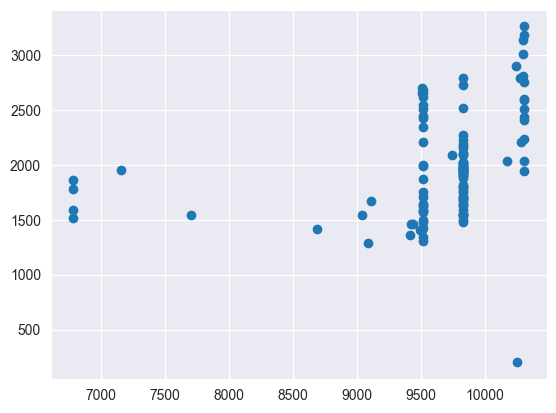

In [532]:
plt.scatter(pivot_sub_semanal['Precio_Asics'], pivot_sub_semanal['Cantidad_Asics'])

# Este es el importante

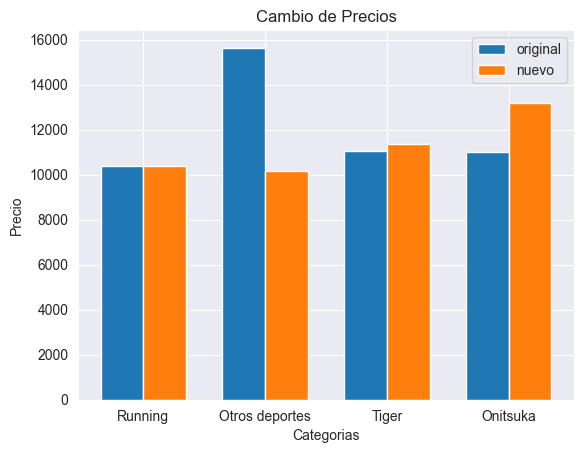

In [533]:
precios_antes = [10382.54734,15639.13732,11064.14431,10984.98529]
precios_nuevos = [10382.54734, 10165.43729, 11363.91209, 13181.98235]

productos = ['Running', 'Otros deportes', 'Tiger', 'Onitsuka']

bar_width = 0.35  # Width of the bars
index = range(len(productos))

plt.bar(index, precios_antes, width=bar_width, label='original')
plt.bar([i + bar_width for i in index], precios_nuevos, width=bar_width, label='nuevo')

plt.xlabel('Categorias')
plt.ylabel('Precio')
plt.title('Cambio de Precios')
plt.xticks([i + bar_width / 2 for i in index], productos)

plt.legend()
plt.savefig('imagenes/cambio_de_precios.jpg', format='jpg', dpi=300)
plt.show()

In [534]:
pivot_sub_segmento = df_mercado_1.pivot_table(index = 'fecha', columns= ['Sub Marca','Segmento'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'min', 'Precio':'mean'}).dropna()#.reset_index()


In [535]:
columnas_nuevas_sub_seg = []
for i in pivot_sub_segmento.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1] + "_" + i[2])

pivot_sub_segmento.columns = columnas_nuevas_sub_seg

In [536]:
pivot_sub_segmento.head()

,Cantidad_Adidas_Futbol,Cantidad_Adidas_O. Deportes,Cantidad_Adidas_Running,Cantidad_Adidas_Social,Cantidad_Asics_O. Deportes,Cantidad_Asics_Running,Cantidad_Asics Tiger_Social,Cantidad_Nike_Futbol,Cantidad_Nike_O. Deportes,Cantidad_Nike_Running,...,Precio_Asics Tiger_Social,Precio_Nike_Futbol,Precio_Nike_O. Deportes,Precio_Nike_Running,Precio_Nike_Social,Precio_Onitsuka Tiger_Social,Precio_Puma_Futbol,Precio_Puma_O. Deportes,Precio_Puma_Running,Precio_Puma_Social
fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-24,176.0,29.0,89.0,325.0,33.0,115.0,3.0,178.0,236.0,396.0,...,11364.000000,8818.033708,8795.961864,8090.994949,12636.010571,12636.018182,7200.0,6908.552000,8182.000000,8181.353403
2020-03-25,186.0,25.0,85.0,316.0,41.0,127.0,3.0,228.0,217.0,439.0,...,11364.000000,8818.035088,8795.930876,8090.995444,12634.350459,12636.023810,7200.0,6908.490476,8182.000000,8181.251748
2020-03-26,193.0,29.0,92.0,354.0,41.0,136.0,13.0,208.0,276.0,487.0,...,11363.923077,8818.028846,8795.951087,8090.995893,12634.562701,12636.018182,7200.0,6908.535714,8182.000000,8181.330882
2020-03-27,290.0,51.0,104.0,625.0,57.0,186.0,7.0,187.0,297.0,531.0,...,11364.000000,8716.374332,8795.949495,8090.998117,12636.016129,12636.016393,7200.0,6908.586885,8182.000000,8181.336898
2020-03-28,324.0,51.0,68.0,817.0,57.0,208.0,2.0,181.0,309.0,677.0,...,11364.000000,8779.823204,8795.941748,8090.997046,12636.011928,12636.010526,7200.0,6908.758491,8181.994286,8181.325301


In [537]:
columnas_asics = ['Precio_Asics_O. Deportes', 'Precio_Asics_Running', 'Precio_Asics Tiger_Social', 'Precio_Onitsuka Tiger_Social']

pivot_sub_segmento[columnas_asics]

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-03-24,9214.810000,9818.017391,11364.000000,12636.018182
2020-03-25,9214.810000,9818.007874,11364.000000,12636.023810
2020-03-26,9214.860976,9818.000000,11363.923077,12636.018182
2020-03-27,9119.806667,9818.010753,11364.000000,12636.016393
2020-03-28,9151.486667,9818.004808,11364.000000,12636.010526
...,...,...,...,...
2022-03-07,10165.687431,10349.471338,11363.963636,13182.000000
2022-03-11,10165.606606,10266.124000,11363.861111,13182.000000
2022-03-12,10165.499680,10374.896000,11364.000000,13181.980892


In [538]:

pivot_sub_segmento_variacion = pivot_sub_segmento.pct_change() * 100
pivot_sub_segmento_variacion = pivot_sub_segmento_variacion.fillna(0)

In [539]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics_O. Deportes', ascending=True).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-04-18,-33.931133,0.000113,-10.345704,-3.891746
2020-04-17,-23.547303,0.000000,-44.230769,-3.435694
2020-03-31,-4.298515,-0.000082,0.000000,0.000000
2020-04-09,-1.101861,-0.000052,0.000000,-0.005088
2020-04-13,-1.078788,0.000000,0.000000,0.000000


In [540]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics_Running', ascending=False).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-08-28,97.973788,10.203233,0.000000,27.520436
2020-10-21,-0.000012,6.430414,-0.000303,0.000122
2022-03-12,-0.001052,1.059524,0.001222,-0.000145
2022-03-14,0.000458,0.243234,-0.000205,0.000000
2022-02-22,0.001150,0.156915,0.000000,-0.000105


In [541]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics Tiger_Social', ascending=False).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-05-11,-0.000067,0.000000,100.000000,0.000000
2021-06-30,0.000663,-0.000287,25.002750,-0.000271
2022-03-04,0.000788,-0.674726,25.002679,7.406412
2021-04-10,0.000352,0.000182,24.452997,0.000000
2021-04-11,-0.000352,-0.000043,0.441735,0.000000


In [542]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Onitsuka Tiger_Social', ascending=False).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-08-28,97.973788,10.203233,0.000000,27.520436
2021-04-01,0.000196,0.000000,0.000055,21.757809
2020-04-14,3.476649,0.000275,0.000000,17.293423
2021-01-15,-0.000540,-0.000098,0.000337,8.168204
2021-11-16,0.000667,0.000193,-0.000167,7.406502


In [543]:
pivot_sub_segmento_variacion

,Cantidad_Adidas_Futbol,Cantidad_Adidas_O. Deportes,Cantidad_Adidas_Running,Cantidad_Adidas_Social,Cantidad_Asics_O. Deportes,Cantidad_Asics_Running,Cantidad_Asics Tiger_Social,Cantidad_Nike_Futbol,Cantidad_Nike_O. Deportes,Cantidad_Nike_Running,...,Precio_Asics Tiger_Social,Precio_Nike_Futbol,Precio_Nike_O. Deportes,Precio_Nike_Running,Precio_Nike_Social,Precio_Onitsuka Tiger_Social,Precio_Puma_Futbol,Precio_Puma_O. Deportes,Precio_Puma_Running,Precio_Puma_Social
fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-25,5.681818,-13.793103,-4.494382,-2.769231,24.242424,10.434783,0.000000,28.089888,-8.050847,10.858586,...,0.000000,0.000016,-0.000352,0.000006,-0.013138,0.000045,0.000000,-0.000891,0.000000,-0.001243
2020-03-26,3.763441,16.000000,8.235294,12.025316,0.000000,7.086614,333.333333,-8.771930,27.188940,10.933941,...,-0.000677,-0.000071,0.000230,0.000006,0.001680,-0.000045,0.000000,0.000655,0.000000,0.000967
2020-03-27,50.259067,75.862069,13.043478,76.553672,39.024390,36.764706,-46.153846,-10.096154,7.608696,9.034908,...,0.000677,-1.152803,-0.000018,0.000027,0.011504,-0.000014,0.000000,0.000741,0.000000,0.000074
2020-03-28,11.724138,0.000000,-34.615385,30.720000,0.000000,11.827957,-71.428571,-3.208556,4.040404,27.495292,...,0.000000,0.727927,-0.000088,-0.000013,-0.000033,-0.000046,0.000000,0.002484,-0.000070,-0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,-61.284404,-52.755906,-20.703125,-83.032940,-8.860759,-57.795699,7.843137,-16.162943,600.000000,-43.095599,...,0.000025,-0.177911,0.002261,0.527279,-0.015841,0.000078,-0.006521,-1.536968,0.334666,-1.601043
2022-03-11,39.336493,40.000000,-35.467980,93.406593,-24.305556,59.235669,-34.545455,-9.247649,-57.142857,20.266667,...,-0.000902,0.228186,-0.002261,-0.119944,-0.112441,0.000000,0.005366,0.322794,-0.000088,1.007891
2022-03-12,59.183673,139.285714,35.114504,110.795455,157.798165,100.000000,16.666667,28.151986,866.666667,32.483370,...,0.001222,0.171510,0.000000,0.055987,0.088119,-0.000145,0.018942,2.442173,0.000052,-0.545853


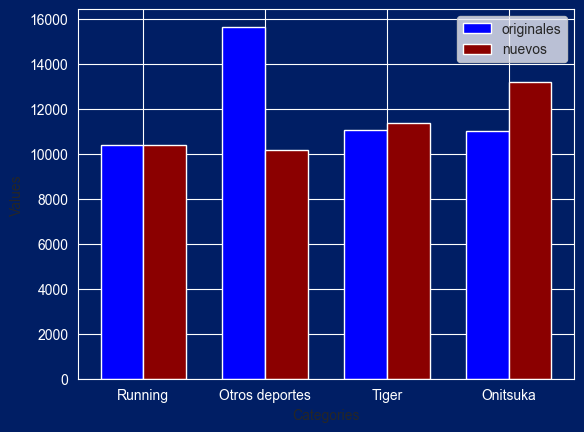

In [544]:
bar_width = 0.35  # Width of the bars
index = range(len(productos))

fig, ax = plt.subplots()

# Plot bars
bar1 = ax.bar(index, precios_antes, width=bar_width, label='originales', color='blue')
bar2 = ax.bar([i + bar_width for i in index], precios_nuevos, width=bar_width, label='nuevos', color='#8B0000')

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
#ax.set_title('Bar Chart with Two Y Values per X Value')
ax.set_xticks([i + bar_width / 2 for i in index])  # Adjust x-axis ticks
ax.set_xticklabels(productos)

ax.legend().get_texts()[0].set_color('white')
ax.legend().get_texts()[1].set_color('white')

# Adding legend
ax.legend()

# Change the background color
ax.set_facecolor('#001e64ff')
fig.set_facecolor('#001e64ff')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='both', colors='white')
# Save the plot as a JPEG image
plt.savefig('bar_chart.jpg', format='jpg', dpi=300)

# Display the plot
plt.show()


# Regresion de onitsuka tiger

In [545]:
X = pivot_sub_segmento[['Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running', 'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes',
       'Precio_Nike_Running', 'Precio_Nike_Social',
       'Precio_Onitsuka Tiger_Social', 'Precio_Puma_Futbol',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Running', 'Precio_Puma_Social']]

X = sm.add_constant(X)
y = pivot_sub_segmento['Cantidad_Asics_O. Deportes']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())
#quitar las cols con p-value mayor a 0.15

                                OLS Regression Results                                
Dep. Variable:     Cantidad_Asics_O. Deportes   R-squared:                       0.302
Model:                                    OLS   Adj. R-squared:                  0.284
Method:                         Least Squares   F-statistic:                     16.68
Date:                        Tue, 21 Nov 2023   Prob (F-statistic):           1.80e-36
Time:                                00:09:39   Log-Likelihood:                -2901.1
No. Observations:                         595   AIC:                             5834.
Df Residuals:                             579   BIC:                             5904.
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

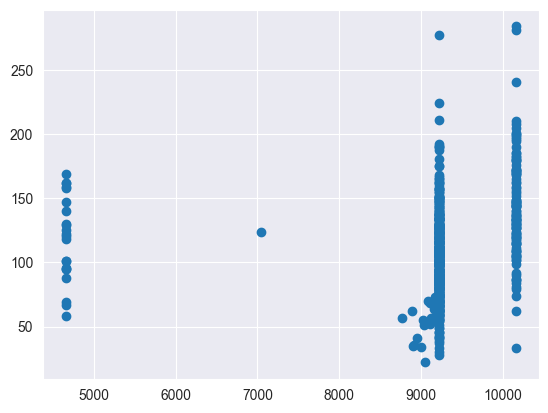

In [546]:
plt.scatter(pivot_sub_segmento['Precio_Asics_O. Deportes'], pivot_sub_segmento['Cantidad_Asics_O. Deportes'])

In [547]:
# Assuming 'model' is your fitted OLS model
intercept = model.params[0]  # Get the intercept
coefficients = model.params[1:]  # Get the coefficients for the independent variables

# List of independent variable names (excluding the constant term)
model.params

const                          -1023.431600
Precio_Adidas_Futbol              -0.003542
Precio_Adidas_O. Deportes          0.003292
Precio_Adidas_Running             -0.005468
Precio_Adidas_Social              -0.005533
Precio_Asics_O. Deportes          -0.021691
Precio_Asics_Running               0.051750
Precio_Nike_Futbol                -0.004867
Precio_Nike_O. Deportes            0.091249
Precio_Nike_Running               -0.004504
Precio_Nike_Social                 0.002403
Precio_Onitsuka Tiger_Social      -0.002697
Precio_Puma_Futbol                -0.002600
Precio_Puma_O. Deportes            0.079286
Precio_Puma_Running               -0.005161
Precio_Puma_Social                -0.037335
dtype: float64

In [548]:
X = pivot_sub_segmento[['Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running', 'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes',
       'Precio_Nike_Running', 'Precio_Nike_Social',
       'Precio_Onitsuka Tiger_Social', 'Precio_Puma_Futbol',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Running', 'Precio_Puma_Social']]

X = sm.add_constant(X)
y = pivot_sub_segmento['Cantidad_Asics_O. Deportes']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())
#quitar las cols con p-value mayor a 0.15

                                OLS Regression Results                                
Dep. Variable:     Cantidad_Asics_O. Deportes   R-squared:                       0.302
Model:                                    OLS   Adj. R-squared:                  0.284
Method:                         Least Squares   F-statistic:                     16.68
Date:                        Tue, 21 Nov 2023   Prob (F-statistic):           1.80e-36
Time:                                00:09:39   Log-Likelihood:                -2901.1
No. Observations:                         595   AIC:                             5834.
Df Residuals:                             579   BIC:                             5904.
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

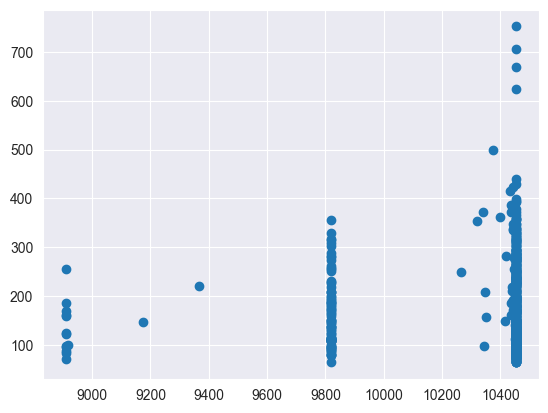

In [549]:
plt.scatter(pivot_sub_segmento['Precio_Asics_Running'],pivot_sub_segmento['Cantidad_Asics_Running'])

# Por segmento

In [550]:
df_running = df[df['Segmento'] == 'Running']

pivot_running = df_running.pivot_table(index = 'fecha', columns= ['Sub Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_running.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_running.columns = columnas_nuevas


In [553]:
pivot_running = pivot_running.dropna()
pivot_running

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,454.0,434.0,1181.0,491.0,8700.911991,9818.006667,8090.994090,7727.011927
1,2020-01-03,475.0,529.0,1345.0,610.0,8700.840541,9818.007293,8090.995361,7727.028016
2,2020-01-04,594.0,820.0,1776.0,909.0,8700.825962,9818.005608,8090.995696,7727.007421
3,2020-01-05,490.0,706.0,1797.0,986.0,8700.829547,9818.004163,8090.999042,7727.005938
4,2020-01-06,452.0,324.0,994.0,491.0,8700.860797,9818.002793,8090.994790,7727.011146
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,318.0,395.0,1274.0,424.0,8700.840881,10359.288431,8862.941295,7740.229966
796,2022-03-11,281.0,551.0,1634.0,515.0,8700.774682,10351.478944,8874.987985,7727.006197
797,2022-03-12,493.0,992.0,2082.0,733.0,8700.673296,10404.377878,8877.495600,7727.006752
798,2022-03-13,334.0,799.0,2157.0,791.0,8700.649230,10376.613023,8863.981188,7727.009514


In [552]:
X = pivot_running[['Precio_Adidas', 'Precio_Nike', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_running['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     29.89
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.56e-18
Time:                        00:09:40   Log-Likelihood:                -5419.7
No. Observations:                 799   AIC:                         1.085e+04
Df Residuals:                     795   BIC:                         1.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           196.3228    242.646      0.809